<a href="https://colab.research.google.com/github/azizeko29/new_deteksi_fraud/blob/master/UCSD_UnderSampling_PemodelanRF_FeatureImportance_pemodelan_klasik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import math
import collections
import time
from scipy import stats

In [0]:
# %matplotlib inline
# from IPython.display import display
# from sklearn import metrics
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error
# from statistics import stdev

from sklearn import tree

from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

In [0]:
# np.random.seed(1)

In [0]:
def confussion_matrik(actual,predict):
    TP,FP,FN,TN = 0,0,0,0
    for i,val in enumerate(actual):
        if val == 0:
            if val == predict[i]:
                TN += 1
            else:
                FP += 1
        if val == 1:
            if val == predict[i]:
                TP += 1
            else:
                FN += 1
    return TP,FP,FN,TN
 
def acc_sens_spec(actual,predict):
    TP,FP,FN,TN = confussion_matrik(actual,predict)
# akurasi
    if (TP+FP+FN+TN) == 0 :
        accuracy = 0 
    else :
        accuracy = (TP+TN)/(TP+FP+FN+TN)
        
# sensitivity
    if (TP+FN) == 0 :
        sensitivity = 0
    else :
        sensitivity = TP/(TP+FN)
        
# specifity    
    if (TN +FP) == 0 :
        specifity = 0
    else :
        specifity = TN/(TN +FP)
        
# precision
    if (TP+FP) == 0 :
        precision = 0
    else :
        precision = TP/(TP+FP)

# recall
    recall = sensitivity

# f1_score
    if (precision+recall) == 0 :
        f1_score = 0
    else :
        f1_score = 2*((precision*recall)/(precision+recall))  
    
    return accuracy,sensitivity,specifity,precision,recall,f1_score

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    #how many correct predictions?
    correct = 0
    #for each actual label
    for i in range(len(actual)):
        #if actual matches predicted label
        if actual[i] == predicted[i]:
            #add 1 to the correct iterator
            correct += 1
    #return percentage of predictions that were correct
    return correct / float(len(actual)) * 100.0

In [0]:
# confussion_matrik(y,pred)

In [0]:
# accuracy,sensitivity,specifity = acc_sens_spec(y,pred)
# print('acc',accuracy)
# print('sens',sensitivity)
# print('spec',specifity)

In [0]:
# accuracy_metric(y,RF.predict(X))

In [0]:
def cross_val_split(X,fold=2,seed=0):
    np.random.seed(seed)
    n_folds= fold
    size = X.shape[0]/n_folds
    X_idx = list(range(X.shape[0]))
    folds_data= []
    for i in range(n_folds):
#         print(X_idx)
        random_idx = list(np.random.choice(X_idx,int(size),replace=False))
#         print(random_idx)
        X_idx = [idx for idx in X_idx if idx not in random_idx]
#         print(X_idx)

        folds_data.append(random_idx)
#         print("--")
    return folds_data

def kfold_cross_validation(model,X,y, n_fold=2, n_seed=0):
    folds = cross_val_split(X,fold=n_fold,seed=n_seed)
    fold_result =[]
    for i in range(len(folds)):
    #     print(i)
        train = []
        for j in range(len(folds)):
            if j != i:
                train = train + folds[j]
        test = folds[i]

        X_train = X.iloc[train,:].reset_index(drop=True)
        y_train = y[train].reset_index(drop=True)

        X_test = X.iloc[test,:].reset_index(drop=True)
        y_test = y[test].reset_index(drop=True)


        t0 = time.time()
        model.fit(X_train, y_train)
        t1 = time.time()
        waktu = t1 - t0

        predict = model.predict(X_test)
        accuracy,sensitivity,specifity,precision,recall,f1_score = acc_sens_spec(y_test,predict)

        result = [accuracy,sensitivity,specifity,precision,recall,f1_score,waktu]
        fold_result.append(result)
        
    return fold_result

In [0]:
from sklearn.decomposition import PCA
import pylab as pl
def plot_this(X_rs,y_rs,method):
  # Use principal component to condense the 10 features to 2 features
  pca = PCA(n_components=2).fit(X_rs)
  pca_2d = pca.transform(X_rs)
  # Assign colors
  for i in range(0, pca_2d.shape[0]):
    if y_rs[i] == 0:
      c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='o')
    elif y_rs[i] == 1:
      c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='*')  
  pl.legend([c1, c2], ['Class 1', 'Class 2'])
  pl.title(method)
  pl.axis([-4, 5, -4, 4])  # x axis (-4,5), y axis (-4,4)
  pl.show()
    


## ---------

In [0]:
# ##read data

# train = pd.read_csv('data/ucsd_fico_train.csv',sep=",")

# test = pd.DataFrame({'0': [0]})
# test_ = pd.read_csv('data/ucsd_fico_test.csv',sep=",")
# test = test.append(test_)
# test = test.reset_index(drop=True)

# df = train.copy()
# df['Class'] = test



In [126]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/open?id=1FrxKcydTkUSbrgTSnnocnGQBtgZj3LKt' # The shareable link

fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('ucsd_fico_train.csv')  
read_df = pd.read_csv('ucsd_fico_train.csv')


1FrxKcydTkUSbrgTSnnocnGQBtgZj3LKt


In [127]:

link = 'https://drive.google.com/open?id=1D4CeWw7WRuTUQB7Zq4E2_-Wgin0y7luT' # The shareable link

fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('ucsd_fico_test.csv')  
test_ = pd.read_csv('ucsd_fico_test.csv')
# Dataset is now stored in a Pandas Dataframe
# df.info()

1D4CeWw7WRuTUQB7Zq4E2_-Wgin0y7luT


In [0]:
test = pd.DataFrame({'0': [0]})
test = test.append(test_)
test = test.reset_index(drop=True)

# df = read_df.copy()
read_df['Class'] = test

In [0]:
df = read_df.copy()

In [0]:
# df.head()

In [0]:
# df.tail()

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
amount        100000 non-null float64
hour1         100000 non-null int64
state1        99999 non-null object
zip1          100000 non-null int64
custAttr1     100000 non-null int64
field1        100000 non-null int64
custAttr2     100000 non-null object
field2        100000 non-null int64
hour2         100000 non-null int64
flag1         100000 non-null int64
total         100000 non-null float64
field3        100000 non-null int64
field4        100000 non-null int64
indicator1    100000 non-null int64
indicator2    100000 non-null int64
flag2         100000 non-null int64
flag3         100000 non-null int64
flag4         100000 non-null int64
flag5         100000 non-null int64
Class         100000 non-null int64
dtypes: float64(2), int64(16), object(2)
memory usage: 15.3+ MB


In [133]:
df.shape

(100000, 20)

In [134]:
df['Class'].value_counts()

0    97346
1     2654
Name: Class, dtype: int64

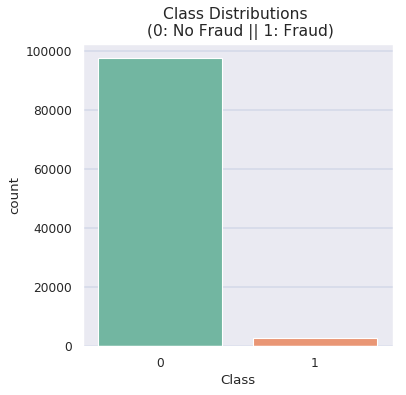

In [135]:
plt.figure(1,figsize=(5, 5), dpi=80)
plt.grid(color='b', linestyle='-', linewidth=0.2)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
sns.countplot('Class', data=df,palette='Set2')


In [136]:
count = 0
for a in df.columns:
    if df[a].isnull().sum() > 0 :
        print(a)
        count+=1
count

state1


1

In [137]:
df['state1'].unique()

array(['WA', 'KY', 'CA', 'GA', 'AZ', 'MO', 'TX', 'IL', 'HI', 'UT', 'NC',
       'NY', 'FL', 'MN', 'VA', 'MA', 'IN', 'LA', 'TN', 'MD', 'NJ', 'ID',
       'OH', 'PA', 'SC', 'AL', 'MI', 'WI', 'DC', 'AR', 'CT', 'OR', 'OK',
       'SD', 'NH', 'NM', 'NV', 'NE', 'MS', 'ND', 'CO', 'KS', 'WV', 'RI',
       'ME', 'IA', 'MT', 'WY', 'AK', 'VT', 'DE', 'AP', 'AE', 'PR', nan],
      dtype=object)

In [0]:
df['state1'] =df['state1'].fillna('CA')

In [139]:
df.iloc[80876:80877]

,amount,hour1,state1,zip1,custAttr1,field1,custAttr2,field2,hour2,flag1,total,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5,Class
80876,49.95,20,CA,9,1234567890183719,3,womaeenhfvtfu@hotmail.com,0,20,0,49.95,3166,23,1,0,1,0,0,1,0


In [140]:
len(df.columns)

20

3.2. Data Preprocessing
The hard version of the dataset contains two sub datasets—training set and testing set. The training set is labeled and the testing set is unlabeled. We have used only the labeled training dataset. It contains 100000 transactions of 73729 customers spanning over a period of 98 days. The dataset contains 20 fields including class labels—amount, hour1, state1, zip1, custAttr1, field1, custAttr2, field2, hour2, flag1, total, field3, field4, indicator1, indicator2, flag2, flag3, flag4, flag5, and Class. It is found that custAttr1 is the account/card number and custAttr2 is e-mail id of the customer. Both these fields are unique to a particular customer and thus we decided to keep only custAttr1. The fields total and amount as well as hour1 and hour2 are found to be the same for each customer and thus we removed total and hour2. Similarly state1 and zip1 are also found to be representing the same information and thus we removed state1. All other fields are anonymized and therefore we decided to keep them as they are. Thus our final dataset contains 16 fields—amount, hour1, zip1, custAttr1, field1, field2, flag1, field3, field4, indicator1, indicator2, flag2, flag3, flag4, flag5, and Class.

In [141]:
df.head(320)

,amount,hour1,state1,zip1,custAttr1,field1,custAttr2,field2,hour2,flag1,total,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5,Class
0,12.95,0,WA,986,1234567890123456,0,luhxsodzmjhng7@comcast.net,0,0,0,12.95,-723,19,0,0,0,0,0,1,0
1,38.85,0,WA,980,1234567890123457,3,pfixyiqfpvkcg@zjyxs.net,1,0,0,38.85,5497,14,1,0,0,1,0,1,0
2,38.85,0,KY,402,1234567890123458,2,shbjoldciswwm@aol.com,1,0,0,38.85,-4420,23,0,0,1,1,0,1,0
3,12.95,0,CA,958,1234567890123459,3,ipbvtdfkhhfws@sbcglobal.net,0,0,0,12.95,5010,31,0,0,1,0,0,1,0
4,38.85,0,GA,300,1234567890123460,3,ivfuvxiennhdp@bellsouth.net,1,0,0,38.85,-4074,21,0,0,1,0,0,1,0
5,12.95,0,AZ,852,1234567890123461,3,gmlvcqewyyczt50@hotmail.com,0,0,1,12.95,-2753,24,0,0,1,1,0,1,0
6,11.01,0,CA,950,1234567890123462,3,curbzphdmpnyw@gmail.com,0,0,0,11.01,2429,14,0,0,0,0,0,1,0
7,10.36,0,WA,980,1234567890123463,3,pjatfyhrvhenr@yahoo.com,1,0,1,10.36,5927,7,0,0,1,0,0,2,0
8,49.95,0,CA,953,1234567890123464,3,lilltbvlolcga@zpsecrihfbuxcqtsvyr.com,0,0,1,49.95,4942,9,0,0,1,1,0,1,0
9,38.85,0,CA,917,1234567890123465,2,otxhmclaiemub7@earthlink.net,0,0,1,38.85,-383,6,0,0,1,0,0,2,0


In [0]:
df = df.drop(['custAttr2','total','hour2','state1',], axis=1)

In [143]:
len(df.columns)

16

3.3. Training and Testing Dataset Creation
The following procedures are used for creating training and testing datasets for evaluating our model.

First, we removed the transactions corresponding to those customers who have only one transaction in dataset since it appears either in training or testing dataset only. Now the dataset has been reduced to 40918 transactions.

Then we divided these 40918 transactions into two sets—training set with 21000 transactions and testing set with 19918 transactions.

Again from the training dataset we removed the transactions corresponding to those customers who have only one transaction in the training dataset since it is hard to find a pattern from a single transaction. Now the training dataset has been reduced to 19165 transactions.

From this dataset, we have randomly selected different groups of customers and their corresponding transactions in the training and testing dataset to create different training and testing datasets to evaluate the performance of FraudMiner with increasing number of transactions. The data distribution is shown in Table 1.

In [0]:
df['frek'] = df.groupby('custAttr1')['custAttr1'].transform('count')
# df['frek'].value_counts()

In [145]:
df.shape

(100000, 17)

In [146]:
df = df[df['frek'] > 1]
df.shape

(40918, 17)

In [147]:
df.tail()

,amount,hour1,zip1,custAttr1,field1,field2,flag1,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5,Class,frek
99976,25.90,14,958,1234567890157691,3,0,1,2186,9,0,0,1,0,0,1,0,18
99981,33.67,14,366,1234567890197161,3,1,1,4177,6,0,0,1,1,0,2,0,2
99988,12.95,14,787,1234567890137953,3,0,1,3357,10,1,0,1,1,0,2,0,19
99992,10.36,14,953,1234567890194145,3,1,1,5169,8,0,0,0,0,0,1,0,2
99997,11.01,14,117,1234567890196488,3,1,1,4261,11,0,0,1,1,0,1,0,2


In [148]:
df = df.reset_index(drop=True)
df.tail()

,amount,hour1,zip1,custAttr1,field1,field2,flag1,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5,Class,frek
40913,25.90,14,958,1234567890157691,3,0,1,2186,9,0,0,1,0,0,1,0,18
40914,33.67,14,366,1234567890197161,3,1,1,4177,6,0,0,1,1,0,2,0,2
40915,12.95,14,787,1234567890137953,3,0,1,3357,10,1,0,1,1,0,2,0,19
40916,10.36,14,953,1234567890194145,3,1,1,5169,8,0,0,0,0,0,1,0,2
40917,11.01,14,117,1234567890196488,3,1,1,4261,11,0,0,1,1,0,1,0,2


In [149]:
df['Class'].value_counts()

0    39722
1     1196
Name: Class, dtype: int64

In [0]:
# df = df.drop(['frek'], axis=1)
df = df.drop(['custAttr1'], axis=1)

In [0]:
# # Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
# from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# # RobustScaler is less prone to outliers.

# std_scaler = StandardScaler()
# rob_scaler = RobustScaler()
# minmax_scaler = MinMaxScaler()

# # df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
# # df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

# df['scaled_amount'] = minmax_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
# df['scaled_time'] = minmax_scaler.fit_transform(df['Time'].values.reshape(-1,1))

# df.drop(['Time','Amount'], axis=1, inplace=True)

# scaled_amount = df['scaled_amount']
# scaled_time = df['scaled_time']

# df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
# df.insert(0, 'scaled_amount', scaled_amount)
# df.insert(1, 'scaled_time', scaled_time)

# # Amount and Time are Scaled!

# df.head()

In [152]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples
df_copy = df.copy()
# df_copy = df_copy.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df_copy.loc[df_copy['Class'] == 1]
# non_fraud_df = df_copy.loc[df['Class'] == 0][:1196]
non_fraud_df = df_copy.loc[df_copy['Class'] == 0].sample(n=1196,random_state=1)

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
df_new = normal_distributed_df.sample(frac=1, random_state=1)
df_new = df_new.reset_index()
df_new = df_new.drop('index', axis=1)
df_new.head()

,amount,hour1,zip1,field1,field2,flag1,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5,Class,frek
0,12.95,8,300,2,1,1,564,11,0,0,0,0,0,2,1,7
1,12.95,21,741,3,0,0,-3176,16,0,0,0,1,0,1,0,3
2,12.95,15,917,2,0,1,3600,10,0,0,0,0,0,1,1,6
3,31.08,14,600,2,0,1,3149,21,0,0,1,1,0,1,1,7
4,10.36,14,499,3,1,1,10,10,0,0,1,0,0,1,0,17


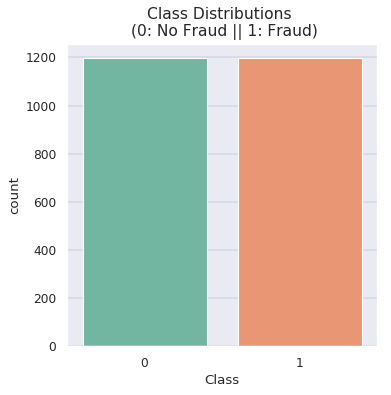

In [153]:
plt.figure(1,figsize=(5, 5), dpi=80)
plt.grid(color='b', linestyle='-', linewidth=0.2)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
sns.countplot('Class', data=df_new,palette='Set2')

In [0]:
# X = df.drop('Class', axis=1)
# y = df['Class'].copy()

In [0]:
X_new = df_new.drop('Class', axis=1)
y_new = df_new['Class'].copy()

In [156]:
y_new.value_counts()

1    1196
0    1196
Name: Class, dtype: int64

In [157]:
X_new.columns

Index(['amount', 'hour1', 'zip1', 'field1', 'field2', 'flag1', 'field3',
       'field4', 'indicator1', 'indicator2', 'flag2', 'flag3', 'flag4',
       'flag5', 'frek'],
      dtype='object')

In [0]:
# from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# # RobustScaler is less prone to outliers.

# std_scaler = StandardScaler()
# rob_scaler = RobustScaler()
# minmax_scaler = MinMaxScaler()

# X_neww = minmax_scaler.fit_transform(X_new)
# X_new = pd.DataFrame(X_neww, columns=X_new.columns)
# X_new.tail()

# # SKLearn


In [159]:
from sklearn.ensemble import RandomForestClassifier
n_tree = 10
clf = RandomForestClassifier(random_state=1,n_estimators=n_tree, max_features='sqrt')
clf.fit(X_new,y_new)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [160]:
from sklearn.tree import DecisionTreeClassifier
clf_DT = DecisionTreeClassifier(random_state=1)
clf_DT.fit(X_new,y_new)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [0]:
def run_skenarion_1 (clf,X,y,kfolds):
    CV_SKLearn = kfold_cross_validation(clf,X,y,n_fold=kfolds,n_seed=1)
    df_result = pd.DataFrame(data= CV_SKLearn, columns=['Akurasi','Sensitivity','Specifity','precision','recall','f1_score','Waktu'])

    df_result.insert(loc=0, column='No', value=list(range(1,df_result.shape[0]+1)))
    df_result = df_result.set_index('No')

    del df_result.index.name

    df_result = df_result.append(df_result.describe()[1:2])
    
    return df_result
# result_SKLearn = result_SKLearn.append('')

In [162]:
result_SKLearn = run_skenarion_1(clf,X_new,y_new,5)
result_SKLearn

,Akurasi,Sensitivity,Specifity,precision,recall,f1_score,Waktu
1,0.753138,0.732218,0.774059,0.764192,0.732218,0.747863,0.027401
2,0.730126,0.730088,0.730159,0.708155,0.730088,0.718954,0.026769
3,0.746862,0.712000,0.785088,0.784141,0.712000,0.746331,0.027239
4,0.742678,0.696970,0.785425,0.752336,0.696970,0.723596,0.028780
5,0.751046,0.692000,0.815789,0.804651,0.692000,0.744086,0.027125
mean,0.744770,0.712655,0.778104,0.762695,0.712655,0.736166,0.027463


In [163]:
result_SKLearn = run_skenarion_1(clf_DT,X_new,y_new,5)
result_SKLearn

,Akurasi,Sensitivity,Specifity,precision,recall,f1_score,Waktu
1,0.746862,0.811715,0.682008,0.718519,0.811715,0.762279,0.010335
2,0.665272,0.734513,0.603175,0.624060,0.734513,0.674797,0.010105
3,0.728033,0.760000,0.692982,0.730769,0.760000,0.745098,0.009917
4,0.686192,0.744589,0.631579,0.653992,0.744589,0.696356,0.010189
5,0.719665,0.732000,0.706140,0.732000,0.732000,0.732000,0.010789
mean,0.709205,0.756564,0.663177,0.691868,0.756564,0.722106,0.010267


In [0]:
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

clf_LR = LogisticRegression()
clf_KNN = KNeighborsClassifier()
clf_SVM = SVC()
clf_NB = GaussianNB()
clf_DT_ = DecisionTreeClassifier(random_state=1)
clf_RF = RandomForestClassifier(random_state=1,n_estimators=10)
##skenario 
skenario_1 = {}
skenario_1['1'] = clf_LR
skenario_1['2'] = clf_KNN
skenario_1['3'] = clf_SVM
skenario_1['4'] = clf_NB
skenario_1['5'] = clf_DT_
skenario_1['6'] = clf_RF

In [0]:
# for i in skenario_1:
# #     print('komposisi', skenario_1[i])

#     clf_skenario = skenario_1[i]

#     result_SKLearn = run_skenarion_1(clf_skenario,X_new,y_new,5)
# #     print(result_SKLearn)
    
#     nama_file = 'hasil/skenario2/random/komposisi999.csv'
#     nama_file = nama_file.replace('999',str(i))

#     result_SKLearn.to_csv(nama_file, sep=';',index=False)
                


In [165]:
result = {}
for i in skenario_1:
#     print('komposisi', skenario_1[i])
  
    clf_skenario = skenario_1[i]

#     result_SKLearn = run_skenarion_1(clf_skenario,X_new,y_new,5)
#     print(result_SKLearn)

    result[i] = run_skenarion_1(clf_skenario,X_new,y_new,5)
    
#     nama_file = 'komposisi999.csv'
#     nama_file = nama_file.replace('999',str(i))

#     result_SKLearn.to_csv(nama_file, sep=';',index=False)
#     !cp komposisi1.csv drive/My\ Drive/
                


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [0]:
# df_result = pd.DataFrame()
# for i in skenario_1:
#     nama_file = 'hasil/skenario2/random/komposisi999.csv'
#     nama_file = nama_file.replace('999',str(i))
#     df_komposisi = pd.read_csv(nama_file,sep=";")
#     df_result = df_result.append(df_komposisi.iloc[5:,:])
    
# df_result.insert(loc=0, column='No', value=list(range(df_result.shape[0])))
# df_result = df_result.set_index('No')

# del df_result.index.name

# df_result.to_csv('hasil/skenario2/random/result.csv', sep=';',index=False)
# df_result

In [167]:
df_result = pd.DataFrame()
for i in skenario_1:
    df_result = df_result.append(result[i].iloc[5:,:])
    
df_result.insert(loc=0, column='No', value=list(range(df_result.shape[0])))
df_result = df_result.set_index('No')

del df_result.index.name

df_result

,Akurasi,Sensitivity,Specifity,precision,recall,f1_score,Waktu
0,0.643096,0.611335,0.675688,0.653428,0.611335,0.631155,0.032245
1,0.674895,0.695789,0.656056,0.669505,0.695789,0.681399,0.002412
2,0.728870,0.462980,0.995012,0.989117,0.462980,0.630579,0.192075
3,0.535146,0.087875,0.982379,0.836302,0.087875,0.158357,0.001855
4,0.709205,0.756564,0.663177,0.691868,0.756564,0.722106,0.010057
5,0.744770,0.712655,0.778104,0.762695,0.712655,0.736166,0.026543


	Akurasi	Sensitivity	Specifity	precision	recall	f1_score	Waktu
0	0.643515	0.611269	0.676482	0.653908	0.611269	0.631376	0.106961
1	0.674895	0.695789	0.656056	0.669505	0.695789	0.681399	0.040600
2	0.728870	0.462980	0.995012	0.989117	0.462980	0.630579	0.621244
3	0.535146	0.087875	0.982379	0.836302	0.087875	0.158357	0.011197
4	0.709205	0.756564	0.663177	0.691868	0.756564	0.722106	0.017727
5	0.744770	0.712655	0.778104	0.762695	0.712655	0.736166	0.044600

In [168]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
fitur_importance =[]
for f in range(X_new.shape[1]):
    if  importances[indices[f]] > 0 :
        fitur_importance.append([X_new.columns[indices[f]],importances[indices[f]]])
        print("%2d) %-*s %f" % (f + 1, 30,
        X_new.columns[indices[f]],
        importances[indices[f]]))

 1) field3                         0.188356
 2) zip1                           0.163208
 3) frek                           0.130702
 4) field4                         0.106586
 5) hour1                          0.106035
 6) amount                         0.072716
 7) flag2                          0.046721
 8) field1                         0.038550
 9) flag5                          0.034140
10) flag1                          0.031791
11) flag3                          0.026947
12) field2                         0.024516
13) indicator1                     0.016464
14) indicator2                     0.009658
15) flag4                          0.003610


In [169]:
df_FI = pd.DataFrame(data=fitur_importance,columns=['fitur','value'])
# np.array(df_FI['fitur'])
df_FI

,fitur,value
0,field3,0.188356
1,zip1,0.163208
2,frek,0.130702
3,field4,0.106586
4,hour1,0.106035
5,amount,0.072716
6,flag2,0.046721
7,field1,0.038550
8,flag5,0.034140
9,flag1,0.031791


In [0]:
# dot_data = StringIO()  
# tree.export_graphviz(clf.estimators_[8], out_file=dot_data,  
#                          feature_names=X_new.columns)  
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

In [0]:
# dot_data = StringIO()  
# tree.export_graphviz(clf_DT,out_file=dot_data,feature_names=X_new.columns)  
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())